# Содержание <a id="0"></a>

1. [Импортируем библиотеки и загружаем датасет](#1)

2. [EDA](#2)

    2.1 [Первичный анализ данных](#21)
    
    2.2 [Углубленный анализ данных](#22)

    2.2.1 [Корреляционный анализ](#221)
        
    2.2.2 [Визуальный анализ](#23)
        
    2.2.3 [Попарный анализ](#24)

    2.2.4 [Взаимодействие признаков с таргетом](#25)
        
    2.2.5 [Выводы по углубленному анализу](#26)

3. [Построение и оценка моделей](#3)

    3.1 [Выводы по обученным моделям](#31)

4. [Выводы по аналитическому решению](#4)

5. [Минусы аналитического решения](#5)

6. [Решение через метод PCA](#6)

    6.1 [Выводы по решению](#61)

7. [Решение с помощью метода обратного отбора](#7)

    7.1 [Выводы по решению](#71)

8. [Выводы по проделанной работе](#8)



****
## Импортируем библиотеки и загружаем датасет <a id="1"></a>
****
[К содержанию](#0)

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error as mae, r2_score
from scipy.stats import kstest


In [2]:
data = pd.read_csv('data_GPN_CUP_inresh.csv')
raw_data = data.copy() # Сохраним исходный датасет, это пригодится нам в дальнейшем

****
## EDA <a id="2"></a>

[К содержанию](#0)
****

**Первичный анализ данных <a id="21"></a>**

In [3]:
# Посмотрим на данные
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.00,1.000


In [4]:
# Узнаем информацию о колонках в датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  float64
 12  Давление выдоха Истока          

In [5]:
# Взглянем на наличие пропусков
data.isna().sum()

Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Температура вдоха Истока          0
Температура выдоха Истока         0
Приток давления Выдоха Истока     0
Давление вдоха Истока             0
Давление выдоха Истока            0
Древний Ветер                     0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Гармония Бессмертия               0
dtype: int64

In [6]:
# Проверим на наличие дубликатов
print('Дубликаты: ', data.duplicated().sum())

Дубликаты:  0


In [7]:
# Соберем статистику по вещественным признакам
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Вектор Мощи,11934.0,5.166667,2.626388e+00,1.138000,3.144000,5.140000,7.148000,9.300000
Скорость перехода через портал,11934.0,7.716600,3.985002e+00,1.543320,4.629960,7.716600,10.803240,13.889880
Приток Силы Потока,11934.0,27247.498685,2.214861e+04,253.547000,8375.883750,21630.659000,39001.426750,72784.872000
Ритм магического ядра,11934.0,223.711688,8.106187e+01,136.939406,145.220958,201.514947,280.447777,372.879926
Поток Энергий,11934.0,8200.947312,1.091316e+03,6589.002000,7058.324000,8482.081500,9132.606000,9797.103000
Сила Левого Потока,11934.0,227.335768,2.004959e+02,5.304000,60.317000,175.268000,332.364750,645.249000
Сила Правого Потока,11934.0,227.335768,2.004959e+02,5.304000,60.317000,175.268000,332.364750,645.249000
Пламя Стихий,11934.0,735.495446,1.736806e+02,442.364000,589.872750,706.038000,834.066250,1115.797000
Температура вдоха Истока,11934.0,736.000000,0.000000e+00,736.000000,736.000000,736.000000,736.000000,736.000000
Приток давления Выдоха Истока,11934.0,2.352963,1.084770e+00,1.093000,1.389000,2.083000,2.981000,4.560000


**Результаты первичного анализа**

- В данных присутствуют `аномальные значения`, поэтому для оценки центральной тенденции мы будем использовать более устойчивые метрики, такие как медиана или усеченное среднее. Также мы учтем наличие выбросов в дальнейшем процессе обработки данных.

- В колонках `Сила Левого Потока` и `Сила Правого Потока` наблюдаются подозрительно схожие значения. Выдвенем гипотезу о том, что значения в этих колонках могут быть равны.

- В колонках `Температура вдоха Истока` и `Давление вдоха Истока`  можно увидеть, что значения повторяются, а также нулевое среднее отклонение. Это может указывать на то, что данные колонки не содержат значимой информации и все значения в них - одинаковые.

- У `целевой переменной` минимальное значение равно 0.975, будем считать это за критическое состояние нашего таргета.

In [8]:
# Посмотрим на Температуру вдоха Истока и Давление вдоха Истока
data[['Температура вдоха Истока', 'Давление вдоха Истока']].value_counts()

Температура вдоха Истока  Давление вдоха Истока
736                       1.394603                 11934
Name: count, dtype: int64

In [9]:
# Проверим гипотезу о том, что данные в двух колонках идентичны
print('Значения в колонках повторяют друг друга' if (data['Сила Левого Потока'] == data['Сила Правого Потока']).all() else 'В значениях естьь различия')

Значения в колонках повторяют друг друга


Теперь мы знаем, что колонки `Температура вдоха истока` и `Давление вдоха Истока` не несут никакой информативности, поэтому мы уберем их.

Наша гипотеза об идентичности в колонках `Сила левого потока` и `Сила правого потока` подтвердилась. Мы объединим их в одну колонку и добавим в датафрейм. Сами же колонки удалим чтобы избежать мультиколлинеарности

In [10]:
data['Общая мощность потоков'] = data[['Сила Левого Потока', 'Сила Правого Потока']].sum(axis=1) # Добавляем колонку
data.drop(['Температура вдоха Истока', 'Давление вдоха Истока', 'Сила Левого Потока', 'Сила Правого Потока'], axis=1, inplace=True) # Удаляем колонки
data.columns # Проверим, что все получилось

Index(['Вектор Мощи', 'Скорость перехода через портал', 'Приток Силы Потока',
       'Ритм магического ядра', 'Поток Энергий', 'Пламя Стихий',
       'Температура выдоха Истока', 'Приток давления Выдоха Истока',
       'Давление выдоха Истока', 'Древний Ветер', 'Печать Чародея',
       'Эмульсия Истока', 'Дыхание Истока', 'Гармония Бессмертия',
       'Общая мощность потоков'],
      dtype='object')

In [11]:
# Теперь посмотрим на категориальные признаки
data.describe(include=object)

,Температура выдоха Истока,Древний Ветер
count,11934,11934
unique,2369,20
top,Исток не вернул выдох,Древний Ветер развеялся
freq,9547,9547


In [12]:
def ratio(column):
    '''
    Функция для подсчета уникальных значений и процентного соотношения

    :param column: Колонка из датафрейма, в которой будут проводиться вычисления
    :return: Таблица с уникальными значениями и процентным соотношением
    '''
    
    counts = column.value_counts() # Подсчет количества уникальных значений для колонки
    percentages = ((counts / counts.sum()) * 100).round(2).astype(str) + '%' # Вычисление процентного соотношения
    result = pd.DataFrame({'Кол-во значений': counts, 'Процентное соотношение': percentages}) # Создание датафреймов для результатов

    return display(result)


ratio(data['Температура выдоха Истока'])
ratio(data['Древний Ветер'])

,Кол-во значений,Процентное соотношение
Температура выдоха Истока,,
Исток не вернул выдох,9547,80.0%
635.572,2,0.02%
606.098,2,0.02%
565.712,2,0.02%
600.093,2,0.02%
...,...,...
691.172,1,0.01%
564.919,1,0.01%
637.581,1,0.01%


,Кол-во значений,Процентное соотношение
Древний Ветер,,
Древний Ветер развеялся,9547,80.0%
1.019,371,3.11%
1.02,348,2.92%
1.026,209,1.75%
1.03,192,1.61%
1.023,170,1.42%
1.036,145,1.22%
1.042,128,1.07%
1.041,124,1.04%


Можем заметить очень интересные вещи
- В колонках числовые значения, однако, из-за присутсвия в каждой колонке текстового значения, колонки стали категориальными
- Текстовые значения занимают большую часть обеих колонок, о чем свидетельствует и процентное соотношение, и их кол-во в колонках

Какие есть мысли в данной ситуации
1. Нужно посмотреть, на что могут влиять значения в колонках, но т.к. в колонке `Температура выдоха Истока` мы можем наблюдать  2369 уникальных значений,то отсмотреть все и найти закономерности будет очень долго и затратно, поэтому поступим следующим образом

    - Сначала переведем все текстовые значения в числовые, обозначим их нулем
    - Возьмем случайным образом строчки с нулевым значением в колонке и с ненулевым, попробуем сравнить их и понять, на что влияют эти значения
    
2. Проведем `визуальный анализ` по каждой из колонке, сравним ее корреляцию с другими колонками, в частности, с таргетной переменной

3. В случае, если данные методы нам не принесут успеха, обратимся к модели `CatBoost`, обучим ее и выведем самые значимые колонки во время обучения. Посмотрим, насколько данная колонка в целом влияет на нашу таргетную переменную. Возможно, она не несет особого смысла из-за 80% нулевых значений

In [13]:
# Замена значений
data.replace(
    {
        'Температура выдоха Истока': {'Исток не вернул выдох': 0},
        'Древний Ветер': {'Древний Ветер развеялся': 0}
    },
    inplace=True
)

# Теперь сделаем колонку вещественной
data[['Температура выдоха Истока', 'Древний Ветер']] = \
    data[['Температура выдоха Истока', 'Древний Ветер']].astype(float)

data.dtypes # Посмотрим на результат

Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Пламя Стихий                      float64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
Общая мощность потоков            float64
dtype: object

In [14]:
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Общая мощность потоков
0,1.138,1.54332,289.964,141.318158,6677.380,464.006,0.000,1.096,5.947,0.000,7.137,0.082,0.95,0.975,15.168
1,2.088,3.08664,6960.180,144.111767,6828.469,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975,56.408
2,3.144,4.62996,8379.229,145.220853,7111.811,606.002,0.000,1.389,7.574,0.000,13.086,0.259,0.95,0.975,120.716
3,4.161,6.17328,14724.395,162.050156,7792.630,661.471,0.000,1.658,9.007,0.000,18.109,0.358,0.95,0.975,227.548
4,5.140,7.71660,21636.432,201.513586,8494.777,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975,350.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,681.658,628.950,2.087,10.990,1.027,23.803,0.471,1.00,1.000,350.478
11930,6.175,9.25992,29763.213,241.561772,8800.352,747.405,0.000,2.512,13.109,0.000,32.671,0.647,1.00,1.000,491.908
11931,7.148,10.80324,39003.867,280.444950,9120.889,796.457,680.393,2.982,15.420,1.036,42.104,0.834,1.00,1.000,664.778
11932,8.206,12.34656,50992.579,323.315332,9300.274,892.945,0.000,3.594,18.293,0.000,58.064,1.149,1.00,1.000,876.048


****
## Выводы по первичному анализу данных <a id="211"></a>

[К содержанию](#0)


****

Мы посмотрели на данные, узнали, с чем в дальнейшем предстоит работать, немного почистили датафрейм и перевели все категориальные колонки в вещественные, также мы избавились от ненужных колонок, провели преобразование двух колонок в одну - это уменьшило кол-во данных в датафрейме, при этом не потеряв информативности

## Углубленный анализ данных <a id="22"></a>

[К содержанию](#0)

**Перейдем к более углубленному анализу в рамках `EDA`**, составим себе план действий:
1. Проведем корреляционный анализ
2. Посмотрим на взаимосвязи в данных (будем искать более сложные зависимости)
3. Оценим, насколько данные информативные 
4. Проведем визуальный анализ
5. Посмотрим на взаимодействие данных с таргетом

**Корреляционный анализ <a id="221"></a>**

[К содержанию](#0)

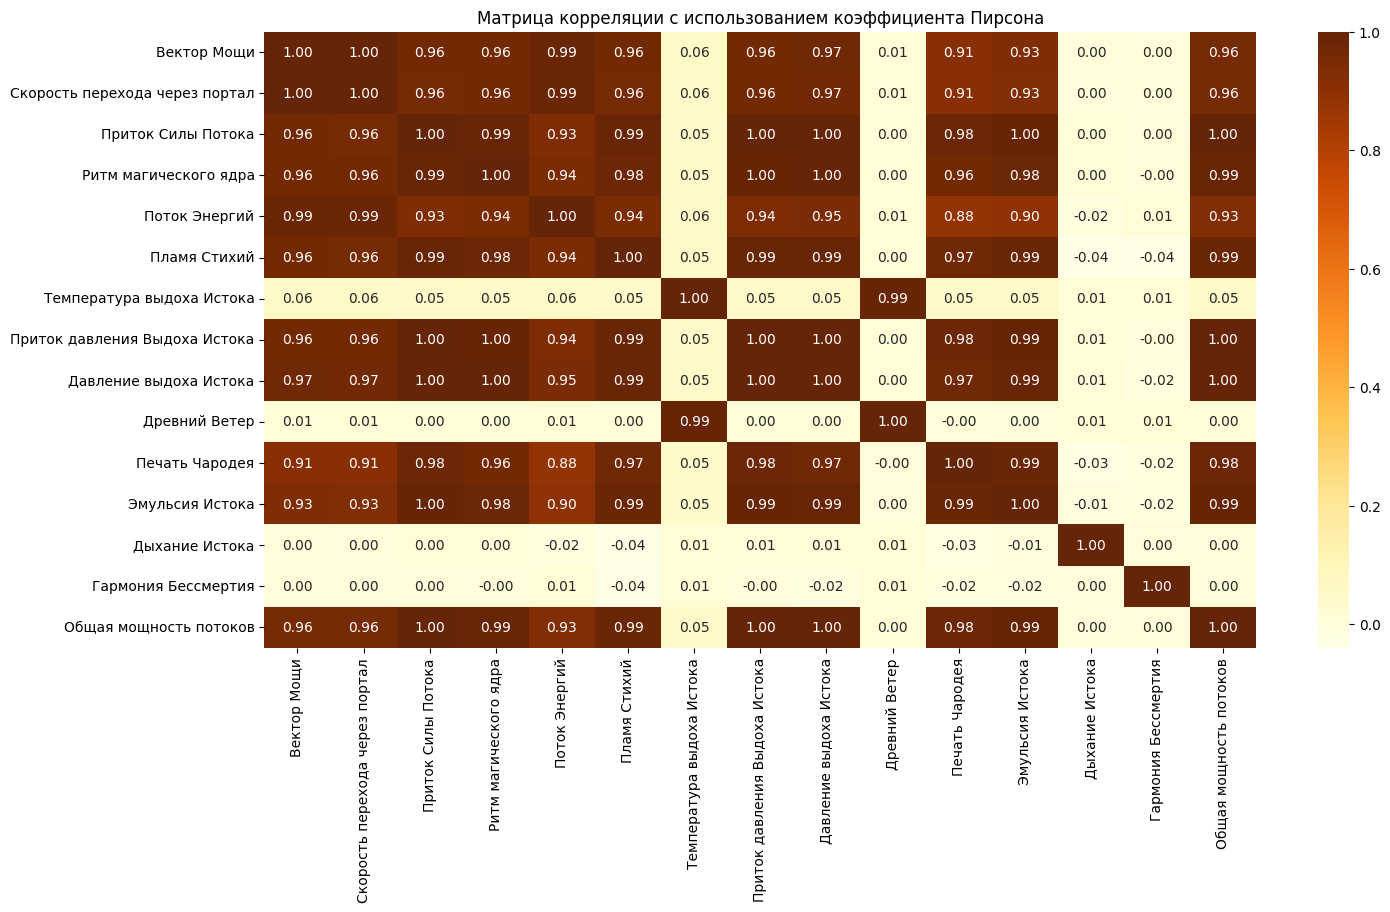

In [15]:
# Посмотрим на матрицу корреляции. За коэффициент корреляции будем использовать классический вариант - коэффициент корреляции Пирсона
corr = data.corr() 
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr', fmt='.2f')
plt.title('Матрица корреляции с использованием коэффициента Пирсона');

Можем заметить следующее:

1. Данные сильно коррелируют между собой
2. Корреляции с таргетом нет ни у одной переменной 

Пока что мы не будем убирать данные из-за сильной корреляции, проведем более детальный анализ, возможно, нам получится создать новые признаки на фоне сильно коррелирующих, тем самым:

- Избавимся от множества линейно зависимых данных
- Попробуем сделать датасет меньше

Оценим корреляцию с таргетом с помощью коэффициента корреляции Спирмена. 

Это обосновано тем, что коэффициент корреляции Пирсона может найти корреляцию в данных только с линейной зависимостью.
Возможно, данный метод корреляции покажет нам скрытую зависимость (нелинейную)

In [16]:
# Вычисление корреляции Спирмена
correlation_matrix = data.corr(method='spearman')
harmony_correlation = correlation_matrix[['Гармония Бессмертия']]

display(harmony_correlation)



,Гармония Бессмертия
Вектор Мощи,0.000000
Скорость перехода через портал,0.000000
Приток Силы Потока,0.026426
Ритм магического ядра,0.040736
Поток Энергий,0.047026
Пламя Стихий,-0.062887
Температура выдоха Истока,0.008646
Приток давления Выдоха Истока,-0.034772
Давление выдоха Истока,-0.088038
Древний Ветер,0.012198


**Результаты корреляционного анализа <a id="222"></a>**

[К содержанию](#0)


Большая часть признаков линейно коррелирует между собой. Это вызывает ряд проблем
1. Мультиколлениарность - это плохо повлияет на нашу модель. Она станет неустойчивой, скорее всего, модель переобучится 
2. Избыточность признаков - с такой высокой линейной зависимостью, мы можем сказать, что один признак можно линейно выразить через другой

В первую очередь, будем бороться именно с этими проблемами в данных

Какие есть мысли по этому поводу:
- Будем смотреть на данные, пробовать извлечь новые данные
- Извлекать новые данные нужно таким путем, чтобы снизить корреляцию с остальными. Следовательно, будем делать это нелинейными методами



**Визуальный анализ <a id="23"></a>**

[К содержанию](#0)

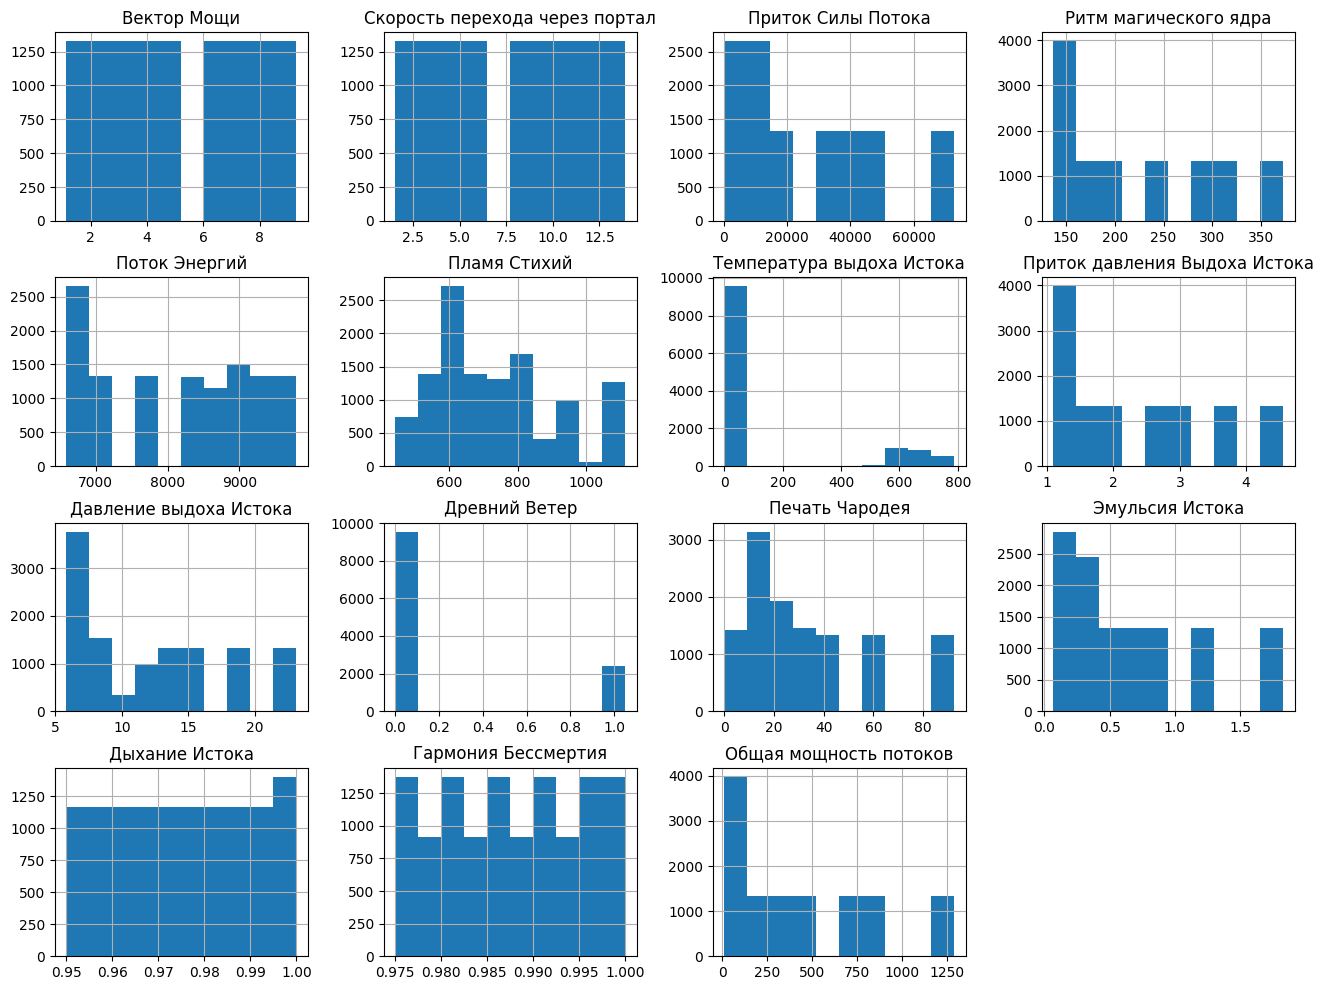

In [17]:
# Посмотрим на гистограммы всех колонок
data.hist(figsize=(16, 12));

Визуальный анализ показал:

Колонки `Вектор Мощи`, `Скорость перехода через портал`, `Дыхание Истока` - Проведем статистический тест и выдвинем гипотезу о том, что распределение в признаках является равномерным

Как и упоминалось ранее, у нас есть две колонки, в которых мы заменили текстовые значения на нули, это колонки `Температура выдоха Истока` и `Древний ветер` - здесь сильно видны аномалии.

`Пламя стихий` - Признак имеет выраженные пики. Это может быть признаком того, что это характеристика событий, где значение скачкообразно изменяется, а не распределяется плавно.

`Гармония Бессмертия` - Все данные собраны в интервале от 0.975 до 1. Так же проведем тест на равномерное распределение

В остальных колонках есть несколько крупных группировок значений с заметными разрывами. Это может быть полезно для разбивки на категории или кластеры, так как разные диапазоны этих признаков могут представлять разные типы событий



**Проведем тест на равномерное распределение**


Нулевая гипотеза: Колонки имеют равномерное распределение.

Альтернативная гипотеза: Колонки не имеют равномерного распределения.

Проверять будем через тест Колмогорова-Смирнова, который даст понять, насколько распределение отличается от заданного (в данном случае — от равномерного распределения).

In [18]:
# Список колонок для тестирования
columns_to_test = ['Дыхание Истока', 'Гармония Бессмертия', 'Вектор Мощи', 'Скорость перехода через портал']

for column in columns_to_test:
    # Проводим тест Колмогорова-Смирнова для текущей колонки
    stat, p_value = kstest(data[column], 'uniform')
    
    # Выводим p-value
    print(f"{column}: p-value = {p_value}")
    
    # Проверяем значимость
    if p_value < 0.05:
        print("Отвергаем H0: распределение не равномерное\n")
    else:
        print("Не отвергаем H0: распределение равномерное\n")

Дыхание Истока: p-value = 0.0
Отвергаем H0: распределение не равномерное

Гармония Бессмертия: p-value = 0.0
Отвергаем H0: распределение не равномерное

Вектор Мощи: p-value = 0.0
Отвергаем H0: распределение не равномерное

Скорость перехода через портал: p-value = 0.0
Отвергаем H0: распределение не равномерное



Выводы по тесту:

- Мы отвергаем нулевые гипотезы, в связи с тем, что p-value равен нулю. Это говорит нам о том, что данные в колонках распределены не равномерно



**Проведем попарный анализ данных<a id="24"></a>**

[К содержанию](#0)

Начнем его с соотношения `Эмульсии Истока` и `Скорости перехода через портал`

Выдвинем гипотезу
- Чем быстрее обьъект перемещается через портал, тем больше магического топлива нужно порталу

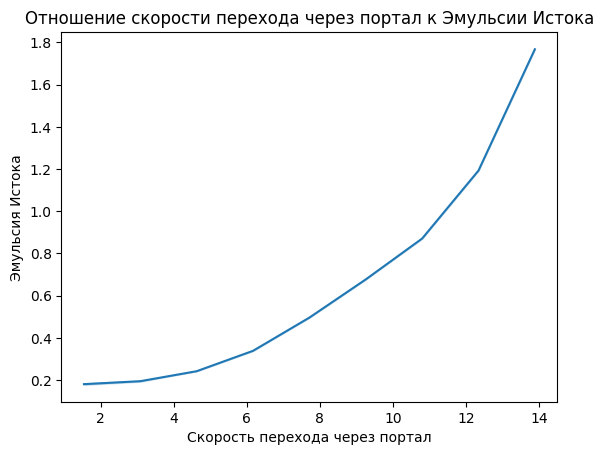

In [19]:
# Построим график
sns.lineplot(data=data, x='Скорость перехода через портал', y='Эмульсия Истока')
plt.title('Отношение скорости перехода через портал к Эмульсии Истока');

Гипотеза подтвердилась, матрица корреляций также показала сильную зависимость между этими признаками

Поступим следующим образом.
- Поделим оба признака, от результата возьмем синус. Таким образом, мы избежим линейной зависимости с другими признаками.
- Колонки удалим из датасета, оставив только новый признак, это поможет сократить избыточность признаков.

Нелинейные преобразования признаков были протестированны на модели CatBoost, в следствие чего были отобраны самые эффективные методы (в данном случае - синус)

In [20]:
# Создаем новый признак
data['Затрачиваемое магическое топливо'] = np.sin(data['Скорость перехода через портал'] / data['Эмульсия Истока'])
data = data.drop(columns=['Скорость перехода через портал', 'Эмульсия Истока'])  # Удаляем исходные признаки

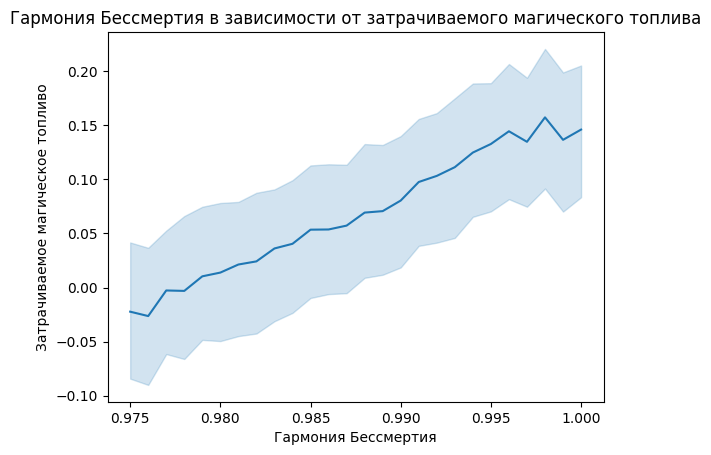

In [21]:
# Посмотрим на соотношение новой фичи и таргета
sns.lineplot(data=data, x="Гармония Бессмертия", y="Затрачиваемое магическое топливо")
plt.title('Гармония Бессмертия в зависимости от затрачиваемого магического топлива')
plt.show()


График показал, что есть зависимость с таргетом, это поможет нам при обучении модели

Посмотрим на колонку `Вектор Мощи` и `Поток Энергий`, предположим следующее:

Число оборотов генератора зависит от позиции магического механизма

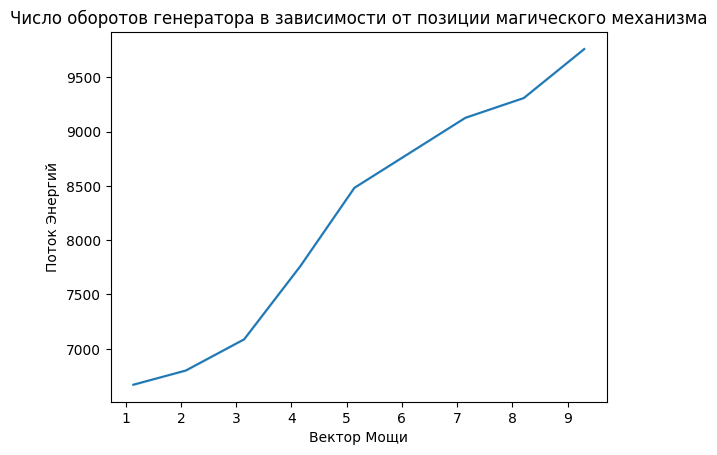

In [22]:
sns.lineplot(data=data, x='Вектор Мощи', y='Поток Энергий')
plt.title('Число оборотов генератора в зависимости от позиции магического механизма')
plt.show()

Утверждение верно, данные признаки плотно взаимосвязаны. 

Если мы вернемся к матрице корреляции, то увидим, что `Вектор Мощи` коррелирует почти со всеми признаками. Выдвину предположение, что вне зависимости от того, где находится магический механизим - он является лишь последствием того, что происходит с порталом и его показателями. Если повышается/понижается значение такой колонки, как `Поток Энергий` и иных - то в связи с этим меняется положение магического механизма. К сожалению, анализ не покажет нам, от чего именно зависит та или иная колонка (из-за сильной корреляции). Но мы будем бороться с избыточностью признаков, поэтому мы уберем сильно зависимый признак (Вектор Мощи)

In [23]:
data.drop('Вектор Мощи', axis=1, inplace=True)

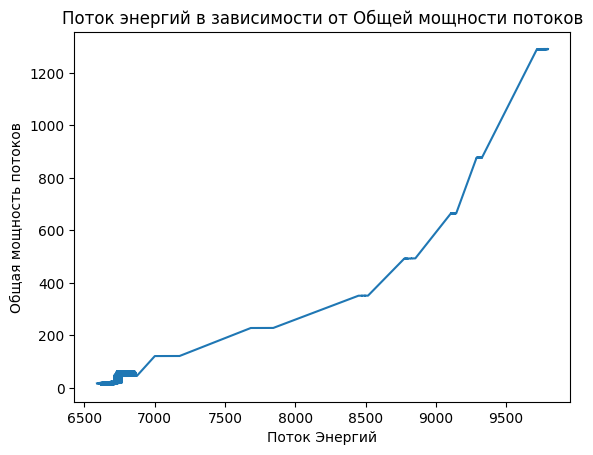

In [24]:
# Вернемся к колонке `Поток Энергий`. Оценим ее с ранее созданной колонкой `Общая мощность потоков`
sns.lineplot(data=data, x='Поток Энергий', y='Общая мощность потоков')
plt.title('Поток энергий в зависимости от Общей мощности потоков')
plt.show()

Видим линейную тенденцию, преобразуем признак в один - суммарная силы потоков, исходные колонки удалим

В данном случае мы воспользуемся обычным сложением, несмотря на линейную зависимость с остальными признаками, иначе, мы потеряем суть данной колонки

In [25]:
data['Суммарная сила потоков'] = data[['Поток Энергий', 'Общая мощность потоков']].sum(axis=1)

data.drop(['Поток Энергий', 'Общая мощность потоков'], axis=1, inplace=True) # Удаляем исходные признаки

Выдвенем гипотезу

- Чем больше давление магического потока на выходе из магического источника, тем больше давление воздуха, исходящего из магического ускорителя

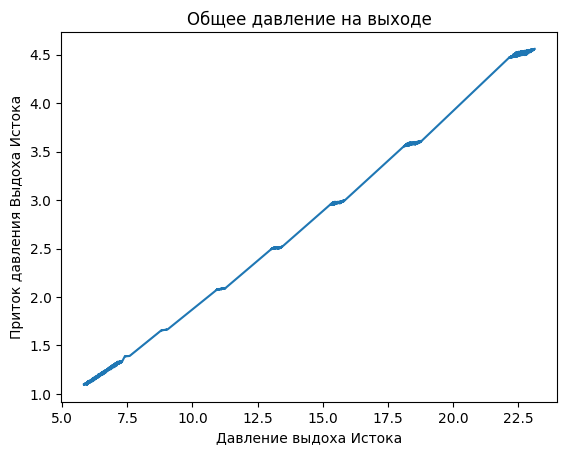

In [26]:
sns.lineplot(data=data, x='Давление выдоха Истока', y='Приток давления Выдоха Истока')
plt.title('Общее давление на выходе');

Гипотеза потдердилась

Объединим колонки, получим значение общего давления. Из этого значения возьмем синус, чтобы избежать линейной зависимости. Исходные колонки удалим из датасета

In [27]:
data['Общее давление'] = np.sin(data['Давление выдоха Истока'] * data ['Приток давления Выдоха Истока'])
data.drop(['Давление выдоха Истока', 'Приток давления Выдоха Истока'], axis=1, inplace=True) # Удаляем исходные признаки

Разберемся с показателями магического ядра

Гипотеза - чем больше ядро магического портала совершает оборотов, тем больше поток магической силы

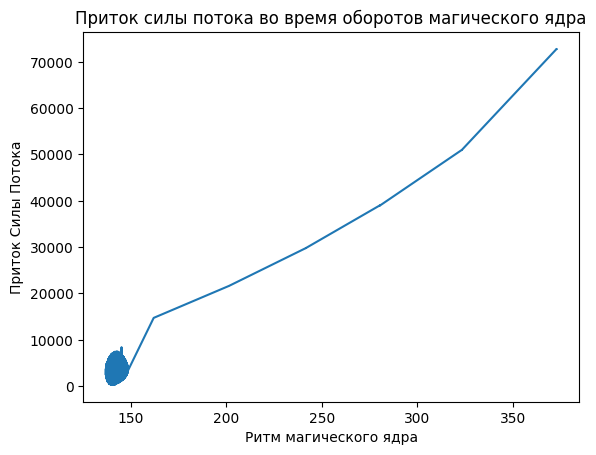

In [28]:
sns.lineplot(data=data, x='Ритм магического ядра', y='Приток Силы Потока')
plt.title('Приток силы потока во время оборотов магического ядра');

Действительно, `Приток Силы Потока` - это последствия `Ритма магического ядра`

Объединим данные колонки, перемножив значения

In [29]:
data['Общая сила ядра'] = data['Приток Силы Потока'] * data['Ритм магического ядра']
data.drop(['Приток Силы Потока', 'Ритм магического ядра'], axis=1, inplace=True)

In [30]:
# Посмотрим, как влияет минимальное и максимальное значение Древнего Ветра на другие переменные
display(data[data['Древний Ветер'] > 0].min(), data[data['Древний Ветер'] > 0].max())

Пламя Стихий                          446.605000
Температура выдоха Истока             542.994000
Древний Ветер                           1.019000
Печать Чародея                          0.000000
Дыхание Истока                          0.950000
Гармония Бессмертия                     0.975000
Затрачиваемое магическое топливо       -1.000000
Суммарная сила потоков               6605.412000
Общее давление                         -0.999999
Общая сила ядра                     40054.837050
dtype: float64

Пламя Стихий                        1.112799e+03
Температура выдоха Истока           7.884330e+02
Древний Ветер                       1.052000e+00
Печать Чародея                      9.226100e+01
Дыхание Истока                      1.000000e+00
Гармония Бессмертия                 1.000000e+00
Затрачиваемое магическое топливо    9.999974e-01
Суммарная сила потоков              1.108680e+04
Общее давление                      9.999982e-01
Общая сила ядра                     2.713944e+07
dtype: float64

In [31]:
# Также посмотрим на случайно выбранные строчки из датафрейма
data[data['Древний Ветер'] > 0].sample(10)

,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Гармония Бессмертия,Затрачиваемое магическое топливо,Суммарная сила потоков,Общее давление,Общая сила ядра
417,643.344,610.407,1.022,17.245,0.951,0.995,-0.678777,8058.427,0.894115,2.386364e+06
9958,695.853,632.765,1.027,24.589,0.992,0.989,-0.136781,8818.011,-0.927526,4.357891e+06
6619,709.693,637.386,1.026,25.307,0.978,0.982,0.300835,8824.751,-0.956677,4.358515e+06
1908,460.764,548.530,1.019,8.491,0.958,0.979,-0.028576,6682.391,0.215487,4.425685e+04
1229,790.993,673.803,1.030,35.191,0.955,0.981,0.658651,9321.555,0.972733,7.198879e+06
1301,782.176,672.034,1.030,34.614,0.955,0.989,0.814438,9329.918,0.996756,7.199209e+06
638,1097.503,785.863,1.049,90.507,0.952,0.993,0.994707,11079.586,-0.488489,2.713460e+07
7511,781.241,668.103,1.030,34.771,0.982,0.977,0.778841,9287.258,0.804242,7.189456e+06
21,659.666,613.524,1.022,18.023,0.950,0.977,-0.999911,8024.259,0.726483,2.386128e+06
11411,1045.567,769.180,1.052,86.833,0.998,0.994,0.974519,11030.091,0.907043,2.713216e+07


In [32]:
# Повторим все это со значениями Температуры выдоха Истока
display(data[data['Температура выдоха Истока'] > 0].min(), data[data['Температура выдоха Истока'] > 0].max())
data[data['Температура выдоха Истока'] > 0].sample(10)

Пламя Стихий                          446.605000
Температура выдоха Истока             542.994000
Древний Ветер                           1.019000
Печать Чародея                          0.000000
Дыхание Истока                          0.950000
Гармония Бессмертия                     0.975000
Затрачиваемое магическое топливо       -1.000000
Суммарная сила потоков               6605.412000
Общее давление                         -0.999999
Общая сила ядра                     40054.837050
dtype: float64

Пламя Стихий                        1.112799e+03
Температура выдоха Истока           7.884330e+02
Древний Ветер                       1.052000e+00
Печать Чародея                      9.226100e+01
Дыхание Истока                      1.000000e+00
Гармония Бессмертия                 1.000000e+00
Затрачиваемое магическое топливо    9.999974e-01
Суммарная сила потоков              1.108680e+04
Общее давление                      9.999982e-01
Общая сила ядра                     2.713944e+07
dtype: float64

,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Гармония Бессмертия,Затрачиваемое магическое топливо,Суммарная сила потоков,Общее давление,Общая сила ядра
4853,581.445,580.394,1.020,12.107,0.970,0.994,0.427698,7235.450,-0.793371,1.216761e+06
853,933.629,738.206,1.041,60.783,0.953,0.991,-0.743550,10198.538,0.678058,1.648897e+07
3462,824.681,692.108,1.035,43.762,0.964,0.995,-0.091370,9799.764,0.999998,1.093255e+07
1633,704.052,639.614,1.026,24.839,0.956,1.000,0.023815,8862.395,-0.608607,4.360594e+06
11396,570.063,574.659,1.021,11.681,0.998,0.993,0.929687,7170.662,-0.822903,1.216231e+06
7035,833.431,690.407,1.035,44.730,0.980,0.976,-0.364502,9783.073,0.108612,1.093782e+07
38,602.680,586.986,1.020,12.949,0.950,0.979,-0.691653,7242.878,-0.865573,1.216898e+06
7526,588.066,580.015,1.020,12.410,0.982,0.979,-0.028576,7170.382,-0.890002,1.216309e+06
7863,817.141,687.103,1.036,43.486,0.983,0.990,-0.019052,9788.532,0.775876,1.093646e+07
5150,595.813,582.745,1.020,12.712,0.972,0.975,-0.458848,7182.401,-0.902080,1.216425e+06


In [33]:
display(data[data['Древний Ветер'] > 0].pivot_table(
    values='Гармония Бессмертия',
    index='Древний Ветер',
    aggfunc='mean'
).sort_values('Гармония Бессмертия'))

,Гармония Бессмертия
Древний Ветер,
1.040,0.976000
1.022,0.983697
1.030,0.985365
1.035,0.985467
1.026,0.985967
1.041,0.986202
1.019,0.987057
1.020,0.987149
1.049,0.987323


Поговорим подробнее про колонку `Древний Ветер` - это давление древней магической энергии, покидающей портал в виде выхлопного потока.

По проведенному выше анализу можно сказать, что никакой сильной/нелинейной зависимости данной колонки с таргетной переменной - нет.
Как показала матрица корреляций - самая большая корреляции у данной колонки была с колонкой `Температура выдоха Истока`, скорее всего - Древний Ветер, это лишь последствие выдоха Истока.

В случае с ритмом магического ядра и притоком силы потока - мы объединили эти колонки, так как в них не было пропусков, однако, в колонке `Древний Ветер` было много пропусков.

- Как следствие - мы удалим данную колонку в связи с неинформативностью

Касаемо `Температуры выдоха Истока` - проведем еще визуальный анализ, чтобы точно понять, насколько колонка информативна

In [34]:
data.drop('Древний Ветер', axis=1, inplace=True)

,Температура выдоха Истока
Гармония Бессмертия,
0.975,635.021340
0.976,643.708778
0.977,649.009643
0.978,640.714259
0.979,644.746082
0.980,659.241510
0.981,637.460545
0.982,651.361205
0.983,652.794684


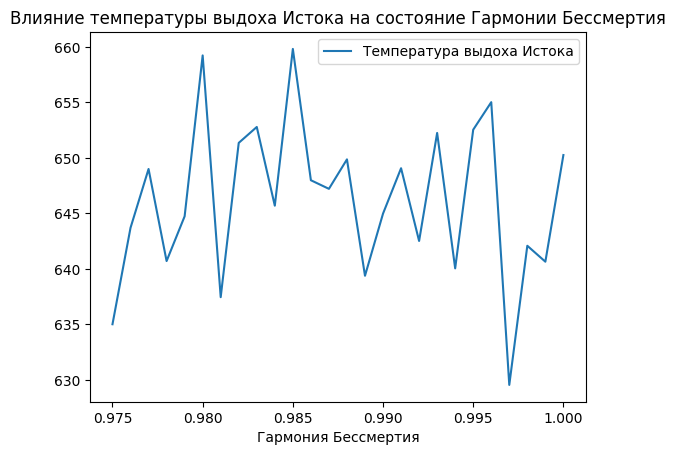

In [35]:
temperature = data[data['Температура выдоха Истока'] > 0].pivot_table(
    values='Температура выдоха Истока',
    index='Гармония Бессмертия'
)

display(temperature)
sns.lineplot(temperature.sort_values('Гармония Бессмертия'))
plt.title('Влияние температуры выдоха Истока на состояние Гармонии Бессмертия');

График показал, что никакой сложной зависимости в данной колонке нет. Уберем данную колонку по следующим причинам:
1. 80% Значений - пропуски
2. Остальные 20% не несут никакой информативности.

Далее рассмотрим колонку `Пламя Стихий`

In [36]:
data.drop('Температура выдоха Истока', axis=1, inplace=True)

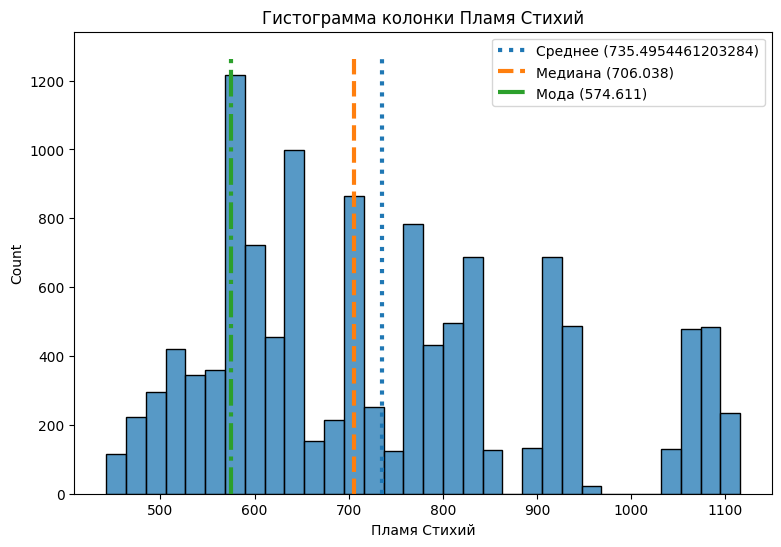

In [37]:
def statistics(data, column):

    '''
    Функция, которая будет вычислять среднее, медиану и моду по колонке, а так же визуализировать это в виде гистограммы

    :param data: датафрейм с исходными данными.
    :param column: Колонка из датафрейма, в которой будут проводиться вычисления
    :return: График, на котором будут показатели колонки
    '''
    # Вычисляем среднее, медиану и моду
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()[0]
    
    plt.figure(figsize=(9, 6))
    sns.histplot(data[column])
    
    # Получаем диапазон значений оси Y
    y = np.linspace(0, plt.ylim()[1], 2)
    
    # Отображаем линию среднего значения
    plt.plot([mean] * 2, y, label=f'Среднее ({mean})', linestyle=':', linewidth=3)
    
    # Отображаем линию медианы
    plt.plot([median] * 2, y, label=f'Медиана ({median})', linestyle='--', linewidth=3)
    
    # Отображаем линию моды
    plt.plot([mode] * 2, y, label=f'Мода ({mode})', linestyle='-.', linewidth=3)
        
    plt.title(f'Гистограмма колонки {column}')
    plt.legend()
    plt.show()

statistics(data, 'Пламя Стихий')

Анализ показал
1. Мода содержится в левой части графика, принимает значение 575
2. Медиана принимает значение 706
3. Среднее равняется 735, но здесь стоит учесть, что у нас есть данные равные 1050 и более. Поэтому среднее, хоть и немного, но отличается от медианы

Данные значения нам могут помочь в следующем:
- Можем понять, что большая часть значений находится в левой части графика, медиана находится также неподалеку (в районе 130) от моды. На графике присутствуют аномальные значения, но они не являются серъезными, поэтому мы оставим их

У нас есть две сильно коррелирующие колонки, это `Пламя Стихий` и `Печать Чародея`

Выдвинем гипотезу
- Чем больше магический впрыск в сердце портала, тем больше температура магической энергии, исходяшей из магического источника портала




In [38]:
display(data[data['Пламя Стихий'] > 0].pivot_table(
    values='Печать Чародея',
    index='Пламя Стихий'
))

,Печать Чародея
Пламя Стихий,
442.364,6.098
444.731,8.399
444.766,4.124
446.176,6.153
446.605,8.005
...,...
1113.705,92.369
1113.985,92.342
1114.609,92.476


Гипотеза подтвердилась, объединим данные колонки путем деления, так же возьмем синус из получившегося значения

In [39]:
data['Магический впрыск'] = np.sin(data['Печать Чародея'] / data['Пламя Стихий'])
data.drop(['Печать Чародея', 'Пламя Стихий'], axis=1, inplace=True)

**Взаимодействие признаков с таргетом<a id="25"></a>**

[К содержанию](#0)

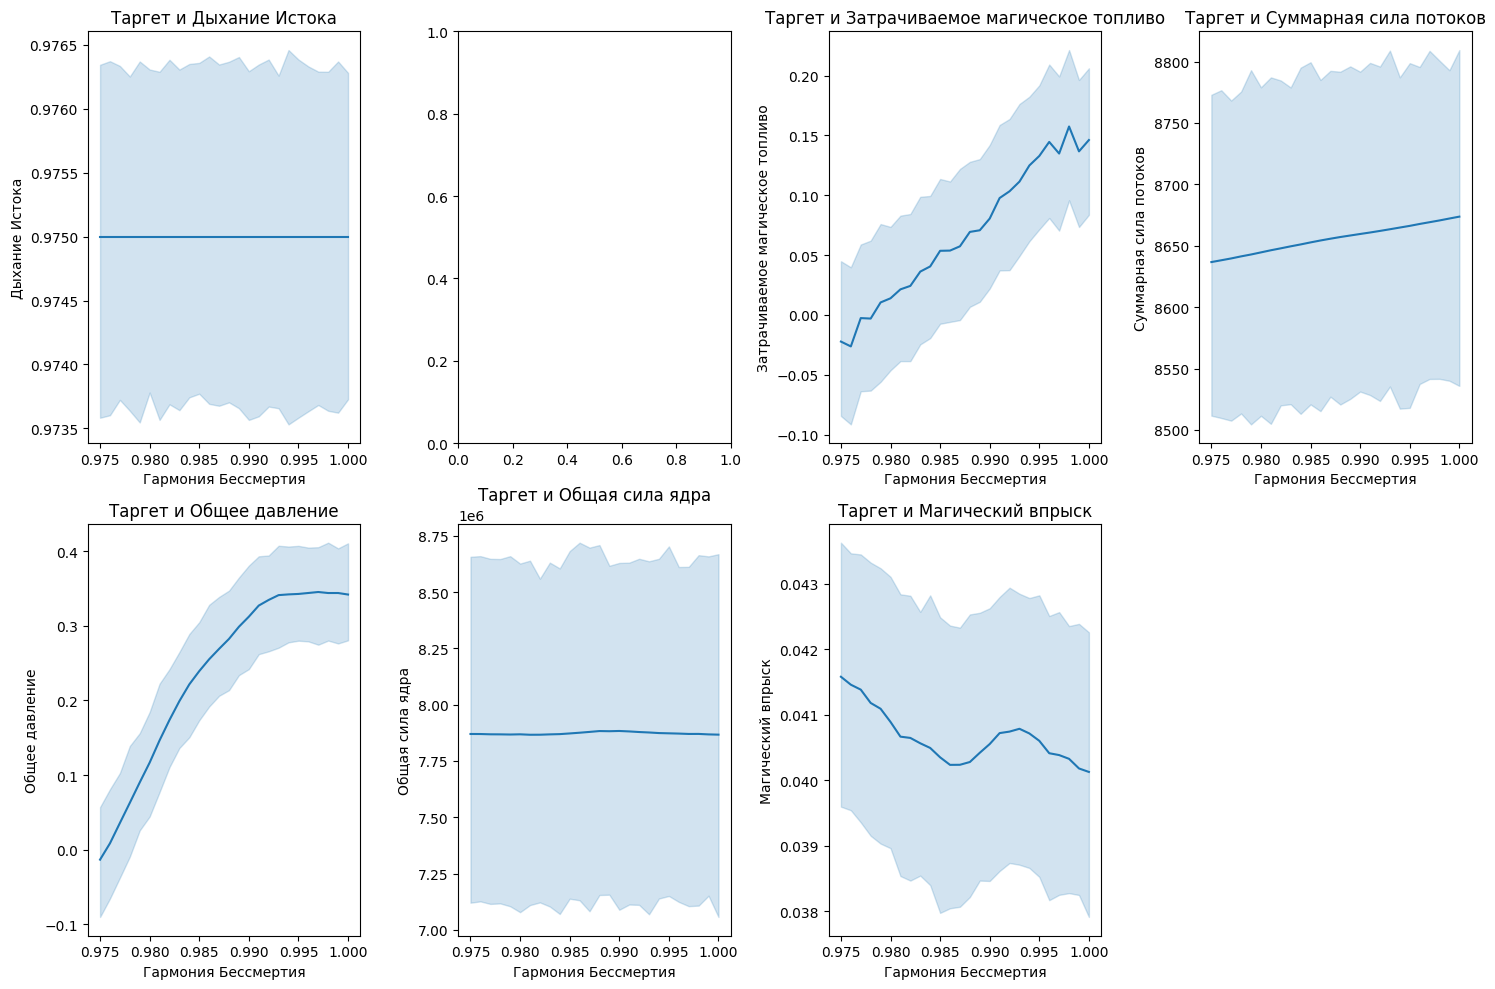

In [40]:
target = 'Гармония Бессмертия'

# Определяем количество признаков, исключая целевую переменную
num_features = len(data.columns) - 1

# Рассчитываем количество строк и столбцов для подграфиков
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

# Создаем сетку подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Перебираем все признаки и создаем графики
for i, column in enumerate(data.columns):
    if column != target:
        row = i // num_cols
        col = i % num_cols
        sns.lineplot(data=data, x=target, y=column, ax=axes[row, col])
        axes[row, col].set_title(f'Таргет и {column}')

# Удаляем пустые подграфики, если они остались
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Что можем увидеть на графиках:
1. `Дыхание Истока` и `Общая сила ядра` - Взаимодействия с таргетом не видно, возможно, данные колонки не несут никакой информативности. 
2. `затрачиваемое магическое топливо` - видим взаимодействие с таргетом. Чем больше мы тратим магического топлива, тем лучше состояние Гармонии Бессмертия
3. `Суммарная сила потоков` - Видно линейную зависимость, чем больше сила потоков, тем лучше состояние нашего таргета
4. `Общее Давление` - Видим положительную корреляцию, следовательно, чем меньше общее давление, тем хуже состояние таргета
5. `Магический впрыск` - Видна отрицательная корреляция, но не линейная

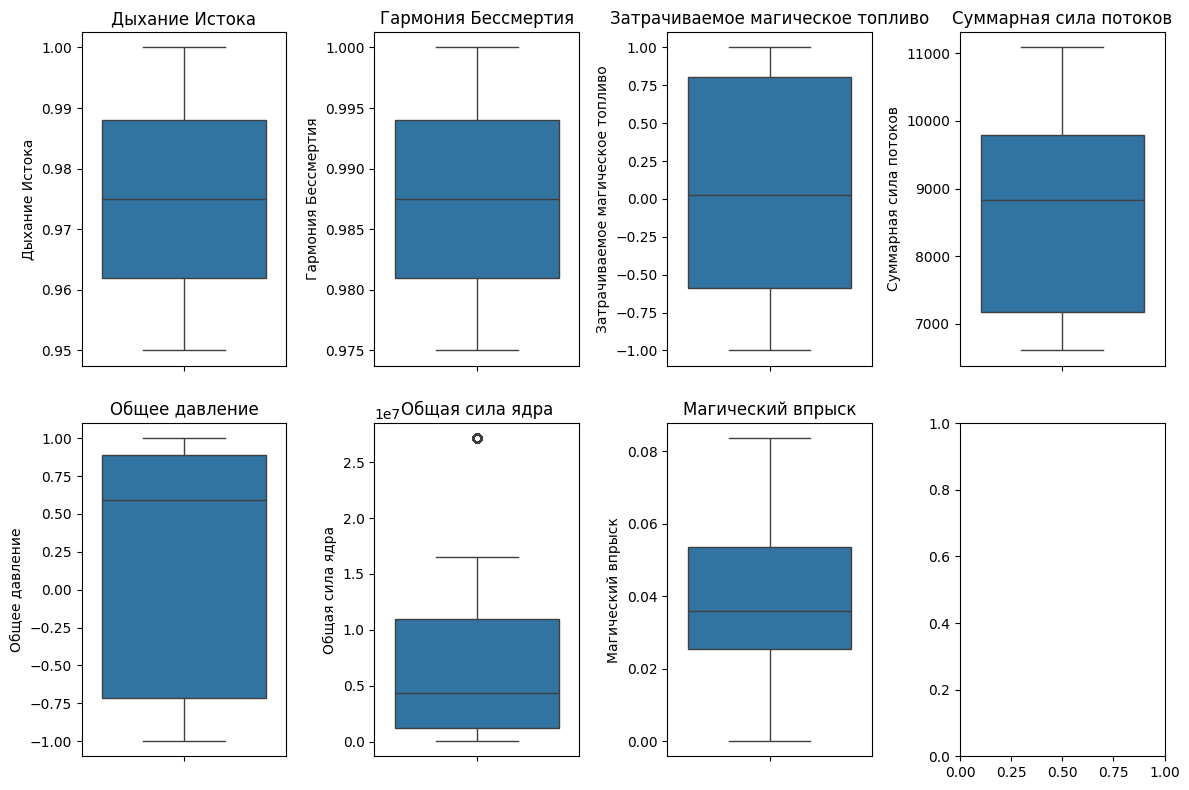

In [41]:
# Проверим остальные колонки на наличие аномалий

fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for i, column in enumerate(data):
        ax = axes.flat[i]
        sns.boxplot(data=data, y=column, ax=ax)
        ax.set_title(f'{column}')

plt.tight_layout()
plt.show()


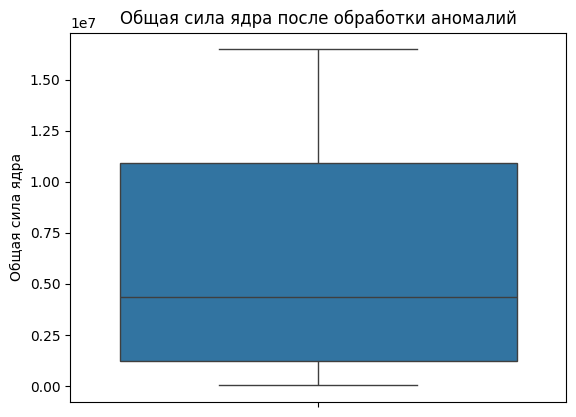

In [42]:
# Видим аномалии в Общей силе ядра
# Заменим все значения больше квантиля 85 на значение этого квантиля
new_value = data['Общая сила ядра'].quantile(0.85)
data.loc[data['Общая сила ядра'] > new_value, 'Общая сила ядра'] = new_value

# Проверим
sns.boxplot(data['Общая сила ядра'])
plt.title('Общая сила ядра после обработки аномалий');


**Выводы по углубленному анализу<a id="26"></a>**

[К содержанию](#0)

- Аномалий в данных нет

- По итогам работы с данными, я сформировал 6 признаков, увидел, что состояние `Гармонии Бессмертия` начинает снижаться, если увеличиваются значения `Общего давления` и `Магического впрыска`.

- Состояние `Гармонии Бессмертия` начинает улучшаться, если увеличиваются значения  `Суммарной силы потоков` и `Затрачиваемого магического топлива` 

- При этом, если признак `Общее давление` и признак `Магический впрыск` достигают критических значений меньше 0,2 и 0,041 , то это говорит о негативном изменении коэффициента Гармонии Бессмертия и стоит вмешаться в работу портала и подкинуть, например, `магического топлива`, что повысит силу потоков и интесивность перехода и нормализует `Общую силу ядра`, это является сигналом к росту коэфициента гармонии бессмертия



****
## Построение и оценка моделей<a id="3"></a>

[К содержанию](#0)
****


Мы проанализировали все признаки, посмотрели на их взаимодействие с таргетом. Обучим две модели -  (1) `CatBoost`, в качестве аргументов:

1. Наша таргетная переменная имеет нелинейные зависимости, о чём свидетельствуют матрица корреляции и визуальный анализ. Модель `CatBoost` способна выявлять сложные взаимосвязи.
   
2. Модель `CatBoost` позволяет оценить важность каждого признака, что поможет нам в дальнейшем анализе и отборе наиболее информативных признаков.

(2) `Линейную регрессию`:

1. Данная модель гораздо быстрее и менее жадная в плане вычислений. 

2. Возможно, данная модель сможет справиться, т.к. в наших данных есть хоть и маленькая, но линейная зависимость

Для оценки предсказаний модели будем использовать классические метрики регрессии:

- `MAE`, так как наша таргетная переменная принимает в основном значения в маленьком диапазоне. Данной метрике важны небольшие погрешности, но для нее большие отклонения не критичны, поэтому мы используем вторую метрику

- `RMSE`, чтобы учитывать крупные ошибки в предсказаниях. Берем корень, чтобы привести результаты к той же числовой шкале, что и данные

- `R2`,  т.к. в нашей задаче таргет изменяется в малом диапозоне, то нам важнее смотреть на метрику R2, которая ответит нам на ворос, понимает ли модель взаимосвязь между признаками и таргетом


In [43]:
data # Смотрим на итоговый датасет, с которым будем работать

,Дыхание Истока,Гармония Бессмертия,Затрачиваемое магическое топливо,Суммарная сила потоков,Общее давление,Общая сила ядра,Магический впрыск
0,0.95,0.975,-0.028576,6692.548,0.232577,4.097718e+04,0.015381
1,0.95,0.975,-0.971164,6884.877,-0.264383,1.003044e+06,0.016768
2,0.95,0.975,-0.826726,7232.527,-0.889161,1.216839e+06,0.021592
3,0.95,0.975,-0.999389,8020.178,0.699257,2.386091e+06,0.027373
4,0.95,0.975,0.798744,8845.389,-0.956924,4.360035e+06,0.036046
...,...,...,...,...,...,...,...
11929,1.00,1.000,-0.625269,8820.491,-0.810486,4.357784e+06,0.034912
11930,1.00,1.000,0.984741,9292.260,0.998381,7.189654e+06,0.043699
11931,1.00,1.000,0.377555,9785.667,0.909238,1.093844e+07,0.052840
11932,1.00,1.000,-0.968890,10176.322,0.226423,1.648668e+07,0.064979


In [44]:
# Создаем датафрейм для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'R2'])

def evaluate_model(data, name, model):

    '''
    Функция для разделения данных, обучения модели и заполнения датафрейма с результатами

    :param data: датафрейм с исходными данными.
    :param name: Произвольное название модели в датафрейме с результатами
    :param model: Алгоритм машинного обучения
    :return: None
    '''

    # Разделение данных на x и y
    X = data.drop('Гармония Бессмертия', axis=1)
    y = data['Гармония Бессмертия']


    # Создаем пайплайн, включающий стандартизацию и модель
    pipeline = Pipeline([
        #('scaler', StandardScaler()) /// Проверка показала, что масштабирование признаков не оказывает влияние на качество моделей
        ('model', model)
    ])

    # Метрики для кросс-валидации
    scoring = {
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error',
        'R2': 'r2'
    }

    # Проводим кросс-валидацию
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_estimator=True)

    # Заполняем результаты в датафрейме
    results_df.loc[len(results_df)] = {
        'Model': name,
        'MAE': -np.mean(cv_results['test_MAE']),
        'RMSE': np.sqrt(-np.mean(cv_results['test_MSE'])),
        'R2': np.mean(cv_results['test_R2'])
    }

In [45]:
def feature_importance(data, model):

    '''
    Функция для построения графика самых важных признаков для модели

    :param data: датафрейм с исходными данными.
    :param model: Алгоритм машинного обучения
    :return: График важности признаков
    '''
    
    X = data.drop('Гармония Бессмертия', axis=1)
    y = data['Гармония Бессмертия']

    # Разделим данные и обучим модель. Это нужно для того, чтобы посмотреть на самые важные признаки для модели
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    model.fit(x_train, y_train) 
          
    # Создание датафрейма с именами признаков и их важностью
    importance_df = pd.DataFrame({
        'feature_name': X.columns,
        'importance': model.feature_importances_
    })
    
    # Сортировка по важности признаков
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    
    # Построение графика
    ax = importance_df.plot.barh(
        x='feature_name',
        y='importance',
        figsize=(10, 7),
        title="Важность признаков для модели CatBoost"  
    )
    ax.set_xlabel('Важность')
    ax.set_ylabel('Признак')

    plt.show()


,Model,MAE,RMSE,R2
0,CatBoost Analystics,0.001484,0.002432,0.896031
1,LR Analystics,0.006389,0.007413,0.022898


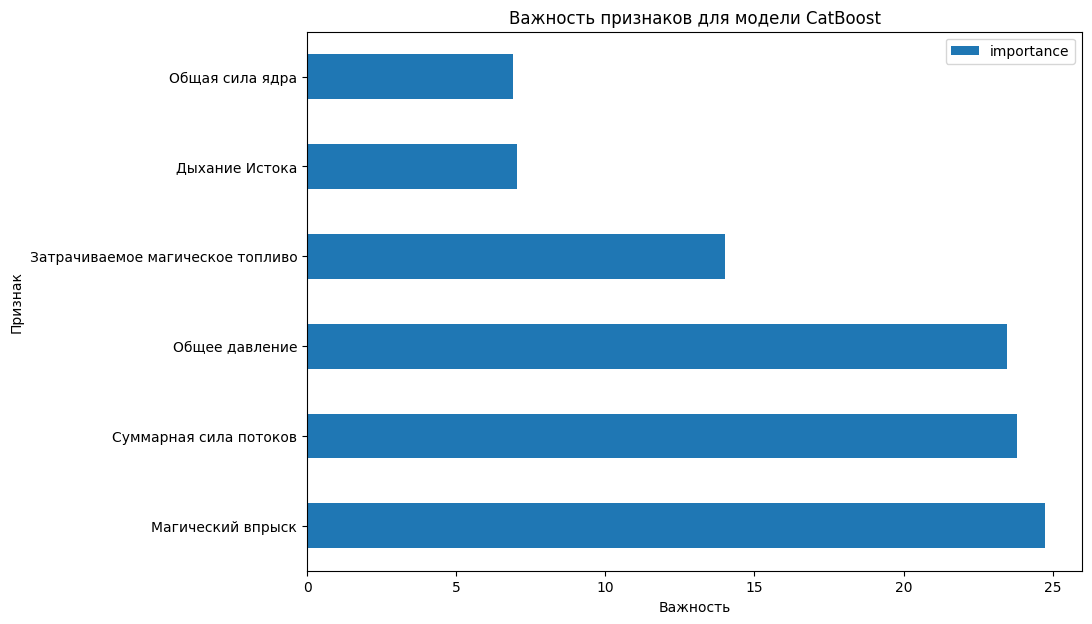

In [46]:
# Посмотрим на результаты
evaluate_model(data, 'CatBoost Analystics', CatBoostRegressor(random_state=42, verbose=False)) # Используем кэтбуст
evaluate_model(data, 'LR Analystics', LinearRegression()) # Используем линейную регрессию
display(results_df)
feature_importance(data, CatBoostRegressor(random_state=42, verbose=False)) # Выводим важные признаки 

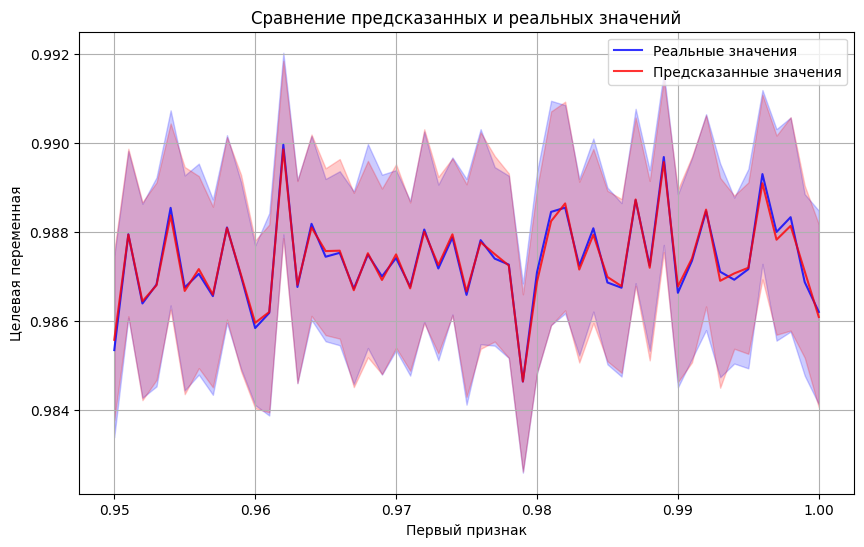

In [47]:
def train_and_visualize_model(data):

    """
    Функция для обучения модели CatBoost и визуализации предсказанных и реальных значений.
    
    :param data: Датафрейм с исходными данными.
    :return: График предсказанных и реальных значений
    """
    X = data.drop('Гармония Бессмертия', axis=1)
    y = data['Гармония Бессмертия']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CatBoostRegressor(verbose=False)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))

    # Выбираем первый признак для оси x, этого будет достаточно, чтобы понять, как модель предсказывает значения
    feature_column = X_test.iloc[:, 0].values

    # Создаем датафрейм для lineplot
    df_plot = pd.DataFrame({
        'Feature': feature_column,
        'Real Values': y_test.values,
        'Predicted Values': y_pred
    })

    sns.lineplot(data=df_plot, x="Feature", y="Real Values", color='blue', label='Реальные значения', alpha=0.8)
    sns.lineplot(data=df_plot, x="Feature", y="Predicted Values", color='red', label='Предсказанные значения', alpha=0.8)

    plt.title('Сравнение предсказанных и реальных значений')
    plt.xlabel('Первый признак')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.grid()
    plt.show()

train_and_visualize_model(data)


**Выводы по обученным моделям<a id="31"></a>**

[К содержанию](#0):
- `CatBoost`
1. Показатели на метриках очень хорошие, модель поняла взаимосвязь между признаками и таргетом.
2. Самые важные признаки для модели - `Суммарная сила потоков`, `Общее давление`, `Магический впрыск` и `Затрачиваемое магическое топлиов`
3. На графике можем видеть, что модель хорошо предсказывает значения для таргета

- `LinearRegression`
1. Модель хорошо показала себя на MAE и RMSE 
2. Смотря, какие коэффициенты вывела линейная регрессия, я заметил, что она занулила те признаки, которые ансамбль деревьев посчитал самыми значимыми.
Возможно, в этом и была ее главная проблема.
3. Нулевой результат на R2 указывает на слабую способность модели объяснять взаимосвязь между признаками и целевой переменной. Модель просто угадывает значения таргета


Подберем гиперпарамметры для модели CatBoost


In [48]:
# Проверка показала, что подбор гиперпараметров занял 35 минут
# Результаты на метриках [MAE: 0.001347	RMSE: 0.002234	R2: 0.912192]
# Прирост качества был минимальный, однако занял много времени, поэтому я скрыл эту часть кода

'''
def tuning_hyperparameters(data, name):

    """
    Функция для подбора гиперпарамметров, подбор осуществлялся для модели CatBoost.
    
    :param data: Датафрейм с исходными данными.
    :param name: Произвольное название модели.
    :return: None
    """

    # Метрики для кросс-валидации
    scoring = {
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error',
        'R2': 'r2'
    }
    
    # Гиперпарамметры для модели
    param_space = {
        'n_estimators': Integer(10, 300),
        'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'max_depth': Integer(3, 15),
        'subsample': Real(0.8, 1.0)  # subsample всегда <= 1.0
    }

    # Подбор осуществляем через Байесовскую оптимизацию
    # Она выбирает точки для оценки на основе предыдущих результатов, что позволяет более эффективно исследовать пространство гиперпараметров.

    bayes_cboost = BayesSearchCV(
        estimator=CatBoostRegressor(),
        search_spaces=param_space,
        n_iter=32,
        cv=3,
        scoring='neg_mean_absolute_error',  # Изменено на подходящую метрику
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    # Обучение модели
    bayes_cboost.fit(x_train, y_train)

    # Теперь получим модель, которая показала себя лучше всего
    best_model = bayes_cboost.best_estimator_

    # Проводим кросс-валидацию
    cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring, return_estimator=True)

    # Заполняем результаты в датафрейме
    results_df.loc[len(results_df)] = {
        'Model': name,
        'MAE': -np.mean(cv_results['test_MAE']),
        'RMSE': np.sqrt(-np.mean(cv_results['test_MSE'])),
        'R2': np.mean(cv_results['test_R2'])
    }
'''


'\ndef tuning_hyperparameters(data, name):\n\n    """\n    Функция для подбора гиперпарамметров, подбор осуществлялся для модели CatBoost.\n    \n    :param data: Датафрейм с исходными данными.\n    :param name: Произвольное название модели.\n    :return: None\n    """\n\n    # Метрики для кросс-валидации\n    scoring = {\n        \'MAE\': \'neg_mean_absolute_error\',\n        \'MSE\': \'neg_mean_squared_error\',\n        \'R2\': \'r2\'\n    }\n    \n    # Гиперпарамметры для модели\n    param_space = {\n        \'n_estimators\': Integer(10, 300),\n        \'learning_rate\': Real(0.01, 0.2, prior=\'log-uniform\'),\n        \'max_depth\': Integer(3, 15),\n        \'subsample\': Real(0.8, 1.0)  # subsample всегда <= 1.0\n    }\n\n    # Подбор осуществляем через Байесовскую оптимизацию\n    # Она выбирает точки для оценки на основе предыдущих результатов, что позволяет более эффективно исследовать пространство гиперпараметров.\n\n    bayes_cboost = BayesSearchCV(\n        estimator=CatBoo

****
**Выводы по аналитическому решению:<a id="4"></a>**
****

[К содержанию](#0)

- Мы достигли хороших показателей на метриках, путем отбора признаков в ручную. В данном случае, у нас получилось уйти от избыточности признаков (Было - 17, стало - 6)

- Для отбора признаков мы использовали базовые методы - визуализацию и оценку корреляции, так же сравнивали признаки между друг другом и извлекали из них новые.
- Часть признаков мы удалили в связи с их неинформативностью либо присутствием сильной корреляции с остальными признаками
- Между некоторыми признаками осталась корреляция, это можно решить тем же понижением признакового пространства, но проверка показала, что мы начнем падать на метриках.
- Несмотря на нелинейное преобразование признаков, модель CatBoost смогла понять взаимосвязь между признаками и целевой переменной

**Как можно усовершенствовать данное решение**
1. Убирать из датафрейма по одному признаку, которые модель посчитала менее информативными

2. Пробовать преобразовать признаки иначе, например, выдвигать другие гипотезы или избавляться от сильно коррелирующих признаков без извлечения новых (Самый короткий путь, но можно потерять важные признаки)
3. Провести подбор гиперпараметров для модели, это приведет к более лучшему результату, но будет затратно для нас. Т.к. показатели на метриках и без этого хорошие, мы остановимся на обычном `CatBoost` без тюнинга (Подбор гиперпараметров описан выше в коде)
4. Экстраполяция таргета. Использовать преобразование для таргета, чтобы расширить диапозон значений с 0.975 - 1 до более больших масштабов. Это нам пригодится для того, чтобы предсказывать состояние таргета, если показатели в признаках будут слишком критическими.
5. Обернуть код в функции, в данном решении есть дублирующиеся строки кода, которые можно было лакончино спрятать под функции



****
**Какие минусы у аналитического решения?<a id="5"></a>**
****

[К содержанию](#0)
- Мы сокращали признаковое пространство с 17 признаков до 6, тем самым, могли утерять информативность некоторых признаков либо убрать полезные для модели признаки (так как мы извлекали новые)
- У нас осталась корреляция между признаками, что могло бы привести к переобучению модели (данный вопрос мы решили с помощью кросс-валидаци, но это не отменяет того факта, что проблема мультиколлениарности была решена не полностью)
- Аналитическое решение подразумевает, что всю работу выполняет человек, и важно помнить о возможном влиянии человеческого фактора – мы можем упустить какие-то важные моменты или допустить ошибку, не заметив её.


Решим данную задачу через методы машинного обучения.

Встроенные методы — это методы, которые одновременно строят модель и фильтруют признаки. 

Из плюсов
- Отсутствует необходимость в исследовательском анализе данных, который занимает большое кол-во времени
- Не нужно делать подсчеты, смотреть, как новый признак влияет на таргет / иные признаки - все это делает модель под капотом
- Получаем сразу и модель, и отобранные признаки

Из минусов
- Можем потерять ценные признаки
- Из-за потери ценных признаков мы можем упасть на метриках
- Сложная визуализация и интерпретация. Мы не сможем сказать (например, для метода PCA) какие признаки были отобраны и какие принесли самый большой вклад в обучение модели



Выделив минусы своего аналитического решения, я решил подойти к этому вопросу с другой стороны и посмотреть, какие признаки выделят алгоритмы машинного обучения, сравним результаты на метриках и выберем самое оптимальное решение

Будем использовать следующие методы
1. `PCA (метод главных компонент)` -  метод, используемый для уменьшения размерности данных, который позволяет выявить наиболее важные признаки в датасете. Он помогает сжать признаковое пространство, сохраняя при этом как можно больше информации.

2. `Метод обертки` - в данном случае будем использовать метод обратного отбора. Очень жадный и дорогой алгоритм, но у нас не так много данных, поэтому мы можем попробовать его на практике

In [49]:
raw_data # Посмотрим на исходный датасет

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.00,1.000


In [50]:
# Замена значений в исходном датасете
raw_data.replace(
    {
        'Температура выдоха Истока': {'Исток не вернул выдох': 0},
        'Древний Ветер': {'Древний Ветер развеялся': 0}
    },
    inplace=True
)

# Теперь сделаем колонки вещественными
raw_data[['Температура выдоха Истока', 'Древний Ветер']] = \
    raw_data[['Температура выдоха Истока', 'Древний Ветер']].astype(float)

raw_data.dtypes # Посмотрим на результат

Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
dtype: object

****
## Решение через метод PCA <a id="6"></a>
****
[К содержанию](#0)

In [51]:
def pca_data(data):
    '''
    Функция, в которой описан метод PCA 
    
    :param data: Датафрейм с исходными данными.
    :return: Датафрейм с применением стандартизации и PCA
    '''

    # Разделение данных на X и y
    X = data.drop('Гармония Бессмертия', axis=1)
    y = data['Гармония Бессмертия']

    # Стандартизация данных
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Применение PCA
    pca = PCA(n_components=3)  # Проверка показала, что стоит уменьшать признаковое пространство до 3-х признаков
    X_pca = pca.fit_transform(X_scaled)

    # Преобразуем результат PCA в датафрейм
    X_pca_df = pd.DataFrame(X_pca, columns=['Feature_1', 'Feature_2', 'Feature_3'])

    # Добавляем обратно таргет
    new_data = pd.concat([X_pca_df, y], axis=1)

    return new_data

pca_dataframe = pca_data(raw_data)
pca_dataframe # Посмотрим на результаты

,Feature_1,Feature_2,Feature_3,Гармония Бессмертия
0,-4.327952,-0.677130,1.684960,0.975
1,-3.294685,2.637560,1.762058,0.975
2,-2.931845,-0.692928,1.694434,0.975
3,-1.881884,-0.704256,1.694444,0.975
4,-0.490519,2.793076,1.752560,0.975
...,...,...,...,...
11929,-0.655143,2.809233,-1.652153,1.000
11930,0.599248,-0.679248,-1.716125,1.000
11931,2.006551,2.926844,-1.666470,1.000
11932,3.683917,-0.725878,-1.729985,1.000


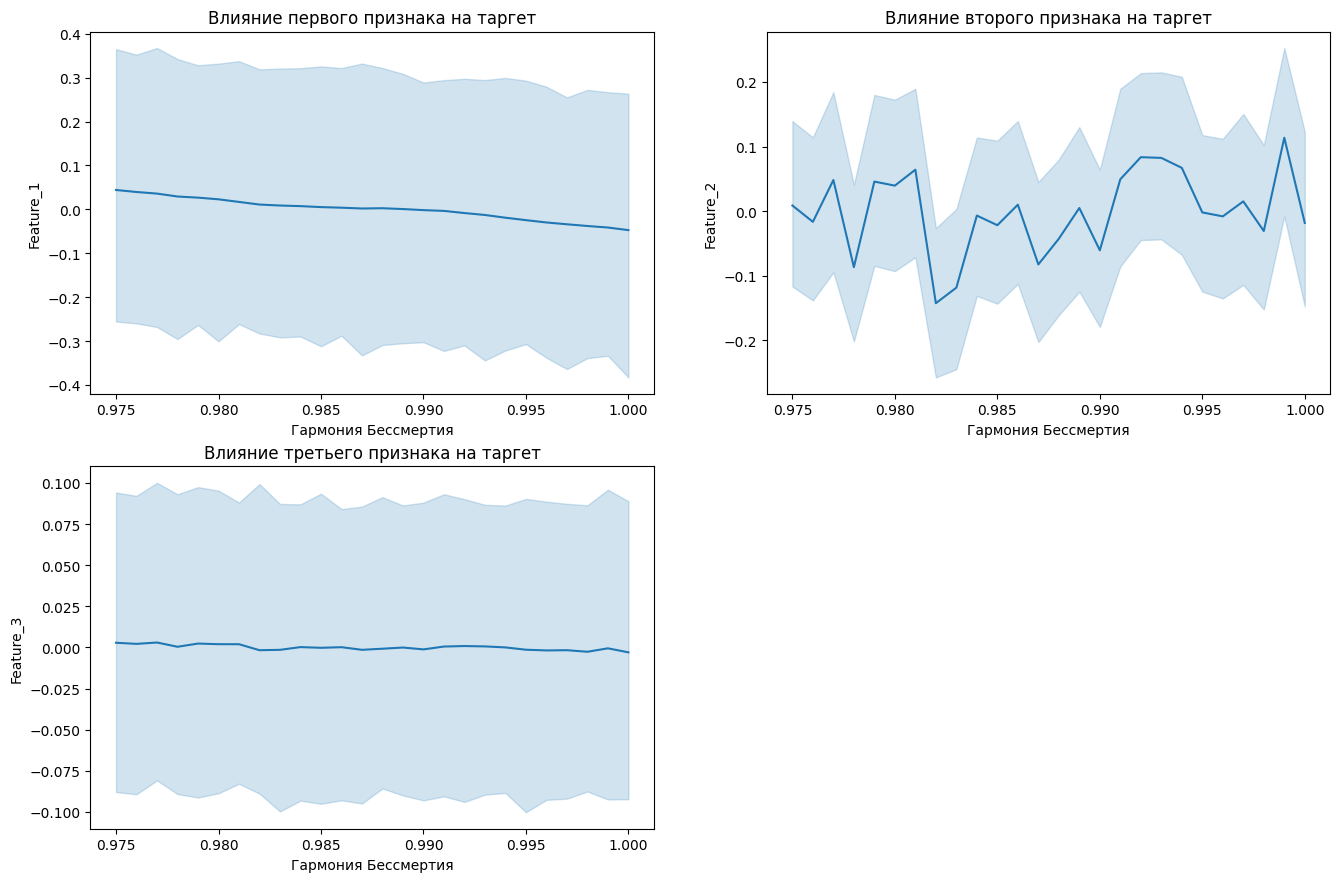

In [52]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
sns.lineplot(data=pca_dataframe, y='Feature_1', x='Гармония Бессмертия')
plt.title('Влияние первого признака на таргет')

plt.subplot(3, 2, 2)
sns.lineplot(data=pca_dataframe, y='Feature_2', x='Гармония Бессмертия')
plt.title('Влияние второго признака на таргет')

plt.subplot(3, 2, 3)
sns.lineplot(data=pca_dataframe, y='Feature_3', x='Гармония Бессмертия')
plt.title('Влияние третьего признака на таргет')

plt.show()

Мы сжали признаковое пространство до 3-х признаков

- Первый признак отрицательно коррелирует с таргетом, скорее всего, это будет самый ценный признак для нашей модели
- У второго признака не видно зависимости с таргетом
- Третий признак так же не влияет на нашу таргетную переменную

Обучим модель CatBoostRegressor на сжатых данных, выведем самые полезные признаки и посмотрим, смог ли данный метод положительно повлиять на наши метрики

,Model,MAE,RMSE,R2
0,CatBoost Analystics,0.001484,0.002432,0.896031
1,LR Analystics,0.006389,0.007413,0.022898
2,CatBoost PCA,0.003480,0.004794,0.591747


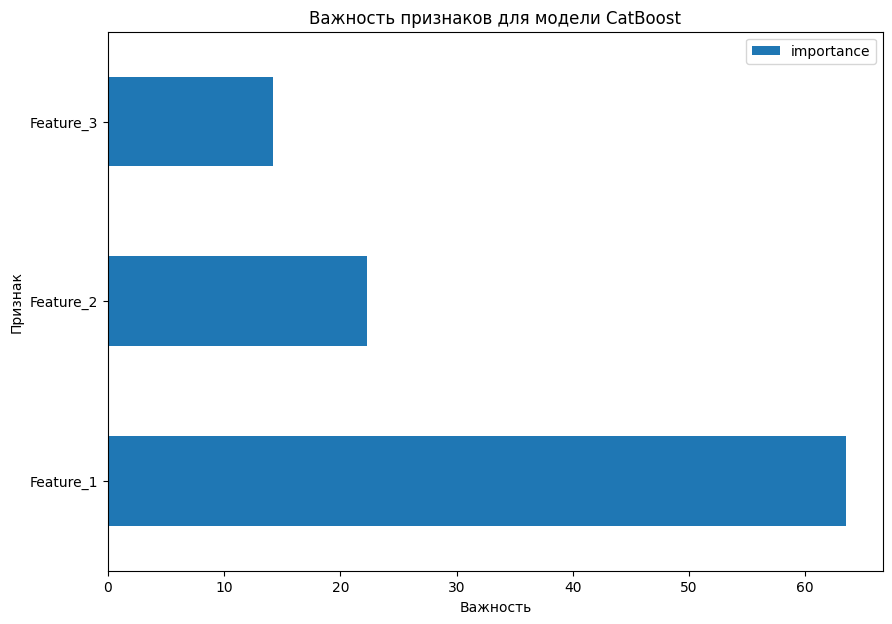

In [53]:
evaluate_model(pca_dataframe, "CatBoost PCA", CatBoostRegressor(random_state=42, verbose=False)) 
display(results_df)
feature_importance(pca_dataframe, CatBoostRegressor(random_state=42, verbose=False)) # Выводим важные признаки 


**Выводы по решениию<a id="61"></a>**

[К содержанию](#0)

Первый признак действительно оказался самым значимым для модели

Показатели на метриках лучше, чем у линейной регрессии, но хуже, чем у кэтбуста с аналитического решения

Выводы по методу главных компонент:
- Наше решение стало гораздо быстрее, буквально в пару ячеек кода.
- На метриках MAE и RMSE модель показала хороший результат, но на метрике R2 мы упали, это свидетельствует о том, что модель не совсем поняла закономерность в данных
- Данное решение можно улучшить, если начать экспериментировать с кол-вом признаков после сжатия и гиперпарамметрами модели, возможно, это привело бы нас к более хорошему результату
- Как и говорилось ранее, мы не сможем интерпертировать решение модели на реальные признаки, тем самым, сложно сказать, что находилось в `Feature_1`

Посмотрим на решение с помощью метода обратного отбора признаков


****
## Решение с помощью метода обратного отбора <a id="7"></a>
****
[К содержанию](#0)

In [54]:
X = raw_data.drop('Гармония Бессмертия', axis=1)
y = raw_data['Гармония Бессмертия']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

def backward_elimination(X, y, threshold=0.01):
    """
    Функция для обратного отбора признаков

    :param X: Набор данных без таргета
    :param y: Таргет
    :param treshold: Порог, который будет влиять на то, удалить признак или нет
    :return: Признаки, которые модель оставила
    """
    cboost = CatBoostRegressor(random_state=42, verbose=False)
    
    features = X.columns.tolist()
    while len(features) > 0:
        cboost.fit(X[features], y)
        y_pred = cboost.predict(X[features])
        
        current_mae = mae(y, y_pred)
        print(f'Текущий MAE: {current_mae}, Признаки: {features}')
        
        # Удаляем наименее значимый признак
        # Будем использовать важность признаков в CatBoost
        feature_importances = cboost.get_feature_importance()
        min_importance_index = feature_importances.argmin()  # Индекс наименее важного признака
        min_importance_feature = features[min_importance_index]  # Название наименее важного признака
        
        # Удаляем признак, если его важность ниже порога
        if feature_importances[min_importance_index] < threshold:
            features.remove(min_importance_feature)
            print(f'Удалён признак: {min_importance_feature}')
        else:
            break 
            
    return features

# Применяем метод обратного отбора
selected_features = backward_elimination(x_train, y_train)

# Обучаем финальную модель на отобранных признаках
final_model = CatBoostRegressor(random_state=42, verbose=False)
final_model.fit(x_train[selected_features], y_train)

# Фикусируем финальные метрики, чтобы потом добавить в датафрейм с результатами
y_test_pred = final_model.predict(x_test[selected_features])
final_mae = mae(y_test, y_test_pred)
final_rmse = np.mean(np.sqrt((y_test - y_test_pred)**2))
final_r2 = r2_score(y_test, y_test_pred)
print(f'Финальный MAE на тестовой выборке: {final_mae}')

selected_features


Текущий MAE: 0.0003900884997679652, Признаки: ['Вектор Мощи', 'Скорость перехода через портал', 'Приток Силы Потока', 'Ритм магического ядра', 'Поток Энергий', 'Сила Левого Потока', 'Сила Правого Потока', 'Пламя Стихий', 'Температура вдоха Истока', 'Температура выдоха Истока', 'Приток давления Выдоха Истока', 'Давление вдоха Истока', 'Давление выдоха Истока', 'Древний Ветер', 'Печать Чародея', 'Эмульсия Истока', 'Дыхание Истока']
Удалён признак: Температура вдоха Истока
Текущий MAE: 0.0003900884997679652, Признаки: ['Вектор Мощи', 'Скорость перехода через портал', 'Приток Силы Потока', 'Ритм магического ядра', 'Поток Энергий', 'Сила Левого Потока', 'Сила Правого Потока', 'Пламя Стихий', 'Температура выдоха Истока', 'Приток давления Выдоха Истока', 'Давление вдоха Истока', 'Давление выдоха Истока', 'Древний Ветер', 'Печать Чародея', 'Эмульсия Истока', 'Дыхание Истока']
Удалён признак: Давление вдоха Истока
Текущий MAE: 0.0003900884997679652, Признаки: ['Вектор Мощи', 'Скорость перехода 

['Вектор Мощи',
 'Скорость перехода через портал',
 'Приток Силы Потока',
 'Ритм магического ядра',
 'Поток Энергий',
 'Сила Левого Потока',
 'Сила Правого Потока',
 'Пламя Стихий',
 'Приток давления Выдоха Истока',
 'Давление выдоха Истока',
 'Печать Чародея',
 'Эмульсия Истока',
 'Дыхание Истока']

In [55]:
# Добавим в датафрейм и посмотрим на результаты
results_df.loc[len(results_df)] = {
        'Model': 'CatBoost SFS',
        'MAE': final_mae,
        'RMSE': final_rmse,
        'R2': final_r2
    }

results_df

,Model,MAE,RMSE,R2
0,CatBoost Analystics,0.001484,0.002432,0.896031
1,LR Analystics,0.006389,0.007413,0.022898
2,CatBoost PCA,0.003480,0.004794,0.591747
3,CatBoost SFS,0.000474,0.000474,0.992559


**Выводы по решению <a id="71"></a>**

[К содержанию](#0)

Модель убрала такие признаки, как `Температура вдоха Истока`, `Давление вдоха Истока`, `Древний Ветер` и `Температура выдоха Истока`
- Две колонки были убраны в связи с тем, что в них содержится 80% пропусков, еще две колонки отбросили, т.к. значения в них не меняются.
- В аналитическом решении мы поступили таким же образом 
- Видим, что на метриках мы сильно приблизились к идеальному решению, однако, наша ключевая задача, как мы обсуждали в начале - **проблема мультиколлениарности и избыточности признаков**, хорошие показатели на метриках - это лишь часть нашей работы.

***
## Выводы про проделанной работе <a id="8"></a>
***
[К содержанию](#0)


Основные цели:

- Предсказание состояние `Гармонии Бессмертия`, работа с мультиколлениарностью и избыточностью признаков

Для решения задачи я применил следующие методы:

- Анализ данных вручную
- Метод PCA
- Метод обратного отбора признаков

Ключевые этапы работы:

1. Предварительная обработка данных

На начальном этапе был осуществлён первичный анализ данных. С его помощью я смог найти и удалить неинформативные колонки, которые не предоставляли значимой информации для последующего анализа. Так же, перевел все категориальные колонки в вещественные

2. Анализ корреляций

Следующим шагом стал корреляционный анализ, направленный на выявление зависимости между признаками. Результаты показали наличие высокой мультиколлинеарности между признаками, что свидетельствовало о наличии двух ключевых проблем: избыточности признаков и их линейной зависимости.

3. Визуальная оценка и проверка гипотез

Для более глубокого понимания структуры данных был проведён визуальный анализ, включая построение графиков распределения значений признаков и проверку гипотезы о равномерности распределения. Был выполнен попарный анализ данных, увидели, как данные взаимодействуют друг с другом на графиках 

4. Преобразования признаков

Были применены нелинейные преобразования к исходным признакам, такие как умножение, деление и взятие синуса. Эти операции позволили создавать новые признаки, которые учитывали взаимодействия между исходными данными и снижали влияние мультиколлинеарности.

5. Оптимизация набора признаков

Благодаря созданию новых признаков стало возможным исключить из анализа старые, избыточные признаки. Это существенно сократило размерность пространства признаков.

6. Визуальная оценка зависимости целевой переменной от признаков

Мы оценили, как новые признаки влияют на целевую переменную, а также проанализировали их корреляцию с таргетом.

7. Построение моделей и оценка результатов

Мы взяли две модели: градиентный бустинг (CatBoost) и линейная регрессия. Оценили важность признаков для модели CatBoost и проанализировали результаты на различных метриках. Модель CatBoost продемонстрировала способность выявлять сложные взаимосвязи между признаками и целевой переменной, что подтверждается высоким показателем коэффициента детерминации (R²). Эта модель подтвердила значимость каждого нового признака для прогнозирования зависимости между колонками и целевой величиной. Линейная регрессия показала хорошие результаты по метрикам средней абсолютной ошибки (MAE) и среднеквадратичной ошибки (RMSE), однако её коэффициент детерминации оказался равен нулю, что указывает на неспособность модели объяснять вариацию целевой переменной.

8. Подбор гиперпараметров

Был осуществлен подбор гиперпараметров для модели CatBoost. Подбор осуществлялся с помощью Байесовской оптимизации. Данная операция заняла достаточно времени и немного улучшила результаты.

9. Решение через метод PCA

Попробовали решить задачу другим путем, использовав метод главных компонент. Сжали признаковое пространство до 3-х признаков, посмотрели, как влияют сжатые признаки на таргет и обучили на них модель CatBoost. Посмотрев результаты на метриках, сделали вывод, что данное решение оказалось слабее, чем ранее построенная модель CatBoost на аналитическом решении. Однако, с его помощью мы смогли решить проблему избыточности признаков и мультиколлениарности.


10. Решение с помощью метода обратного отбора признаков

В этом случае, мы подошли к решению задачи с помощью алгоритма обратного отбора признаков. Использовали исходный датафрейм, задачи значение порога для отсечения признаков и обучили CatBoost. По итогу модель удалила 4 признака, которые изначально не несли никакой информативности. Модель показала отличные результаты на всех метриках, но не решила проблему мультиколлениарности и избыточности признаков




In [57]:
results_df.sort_values(by='R2', ascending=False)

,Model,MAE,RMSE,R2
3,CatBoost SFS,0.000474,0.000474,0.992559
0,CatBoost Analystics,0.001484,0.002432,0.896031
2,CatBoost PCA,0.003480,0.004794,0.591747
1,LR Analystics,0.006389,0.007413,0.022898


По итогу, самым хорошим решением (с учетом решения поставленных проблем) оказалось аналитическое решение.

Метод PCA смог решить поставленные проблемы, но на метрике R2 показал средний результат

Метод обратного отбора отличился самыми хорошими результатами на метриках, но никак не решил поставленные проблемы

Линейная регрессия не смогла понять, в чем заключается взаимосвязь между признаками и таргетом (т.к. мы извлекали признаки путем нелинейного преобразования, использовали данную модель для того, чтобы проверить, возможно ли при таком преобразовании решить задачу менее затратно в плане вычислений)

Рекомендации:

- Для дальнейшего улучшения модели стоит провести дополнительный анализ корреляций и проверить влияние других нелинейных трансформаций.
- Стоит рассмотреть возможность использования других методов отбора признаков (метод прямого отбора, зануление весов у модели Lasso, встроенный метод в Random Forest и т.д.)